<a href="https://colab.research.google.com/github/byronacunia/IT304S/blob/main/IT304ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IT304S: Contratação de Energia para Grandes Consumidores.
##Prof. Dr. Luiz Carlos Pereira da Silva

In [1]:
!git clone https://github.com/byronacunia/IT304S.git

Cloning into 'IT304S'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 31 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [3]:
UC1 = pd.read_csv("/content/IT304S/UC1.csv")

#Dividimos o dataset em treino e test

In [4]:
df_train = UC1["Consumo Total"].iloc[:57]
df_test = UC1["Consumo Total"].iloc[57:]

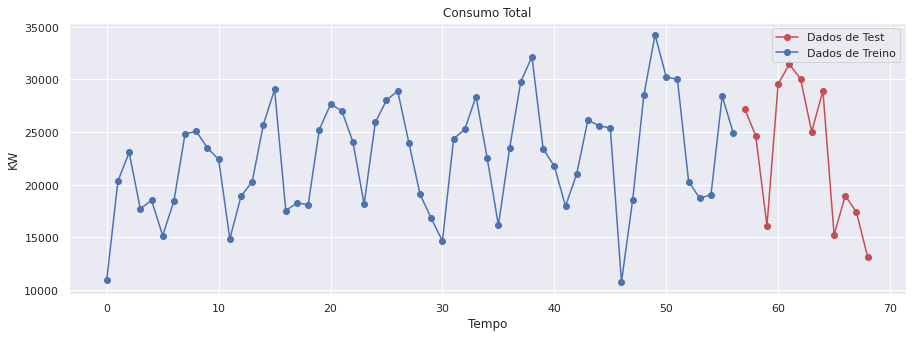

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KW")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino'])
_ = plt.title("Consumo Total")
plt.show()

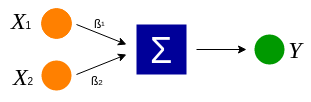

# Função para obter X e Y

In [6]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
             break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [7]:
X_train, Y_train = split_sequence(df_train.values,1)
X_test, Y_test = split_sequence(df_test.values,1)

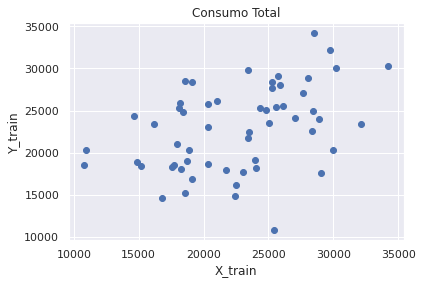

In [8]:
plt.scatter(X_train,Y_train)
_ = plt.title("Consumo Total")
_ = plt.xlabel("X_train")
_ = plt.ylabel("Y_train")

#Modelo de Regressão Linear com uma amosrta passada

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
modelo = LinearRegression() 
modelo.fit(X_train, Y_train) # treinamento do modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
modelo.coef_

array([0.3990743])

#Modelo de Regressão Linear com quatro amosrtas passadas

In [33]:
X_train, Y_train = split_sequence(df_train.values,4)
X_test, Y_test = split_sequence(df_test.values,4)

In [34]:
X_test

array([[27245, 24650, 16102, 29582],
       [24650, 16102, 29582, 31439],
       [16102, 29582, 31439, 30069],
       [29582, 31439, 30069, 25042],
       [31439, 30069, 25042, 28936],
       [30069, 25042, 28936, 15247],
       [25042, 28936, 15247, 18967],
       [28936, 15247, 18967, 17399]])

In [35]:
Y_test

array([31439, 30069, 25042, 28936, 15247, 18967, 17399, 13149])

In [13]:
modelo = LinearRegression() 
modelo.fit(X_train, Y_train) # treinamento do modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
modelo.coef_

array([ 0.17963678, -0.47120917, -0.16344207,  0.49411826])

#Modelo de Regressão Linear com duas amosrtas passadas

In [15]:
X_train, Y_train = split_sequence(df_train.values,2)
X_test, Y_test = split_sequence(df_test.values,2)

In [16]:
modelo = LinearRegression() 
modelo.fit(X_train, Y_train) # treinamento do modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
modelo.coef_

array([-0.40090584,  0.58987058])

In [19]:
previsoes = modelo.predict(X_test)
df_previsoes = pd.DataFrame(previsoes,index=range(58,68,1))

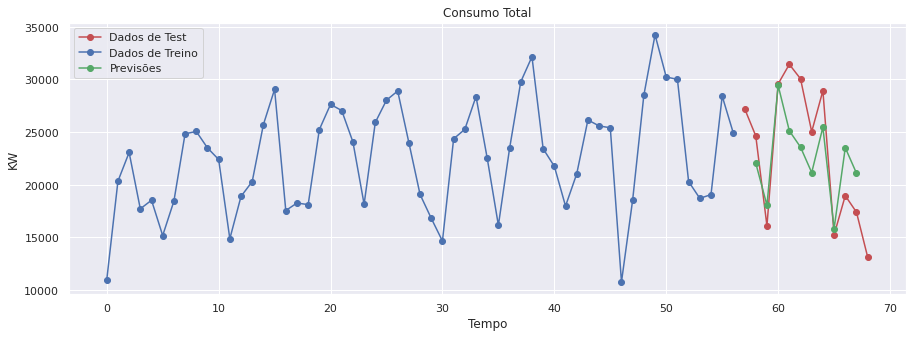

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(df_previsoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KW")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino', 'Previsões'])
_ = plt.title("Consumo Total")
plt.show()

#Modelo de Regressão Linear com uma amosrta passada

In [27]:
X_train, Y_train = split_sequence(df_train.values,1)
X_test, Y_test = split_sequence(df_test.values,1)
modelo = LinearRegression() 
modelo.fit(X_train, Y_train) # treinamento do modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
previsoes = modelo.predict(X_test)
df_previsoes = pd.DataFrame(previsoes,index=range(57,68,1))

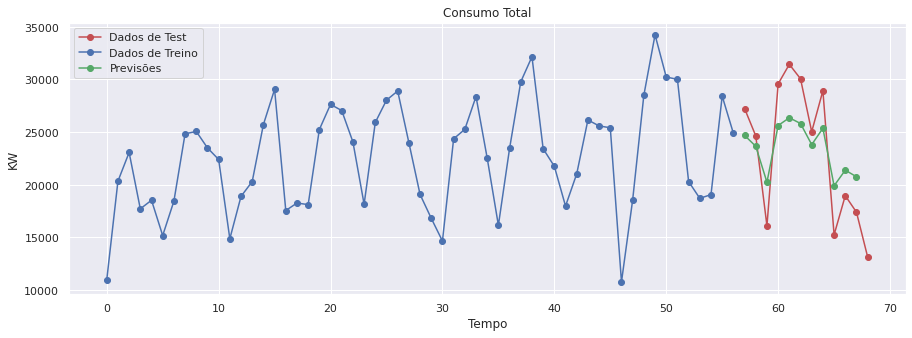

In [29]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(df_previsoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KW")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino', 'Previsões'])
_ = plt.title("Consumo Total")
plt.show()

In [31]:
X_test

array([[27245],
       [24650],
       [16102],
       [29582],
       [31439],
       [30069],
       [25042],
       [28936],
       [15247],
       [18967],
       [17399]])

In [32]:
Y_test

array([24650, 16102, 29582, 31439, 30069, 25042, 28936, 15247, 18967,
       17399, 13149])

#Utilizar outras variaveis (Features) com Ridge Regression (Regularização)

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Use stock symbols to extract training data
X = UC1[['DEMANDA_REGISTRADA_P', 'DEMANDA_REGISTRADA_FP', 'ENERGIA_PONTA', 'ENERGIA_FPONTA']]
y = UC1[['Consumo Total']]

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[1. 1. 1.]


In [36]:
X

,DEMANDA_REGISTRADA_P,DEMANDA_REGISTRADA_FP,ENERGIA_PONTA,ENERGIA_FPONTA
0,40.00,81.00,792,10180
1,65.00,123.00,1562,18783
2,77.00,133.00,1748,21323
3,77.00,133.00,1393,16324
4,36.00,118.00,1359,17178
...,...,...,...,...
64,47.00,105.00,2316,26620
65,31.08,86.94,942,14305
66,86.94,154.56,1345,17622
67,75.18,154.98,1451,15948


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, shuffle=False, random_state=1)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

0.9999999999999999


In [38]:
df_previsoes = pd.DataFrame(predictions,index=range(54,68,1))

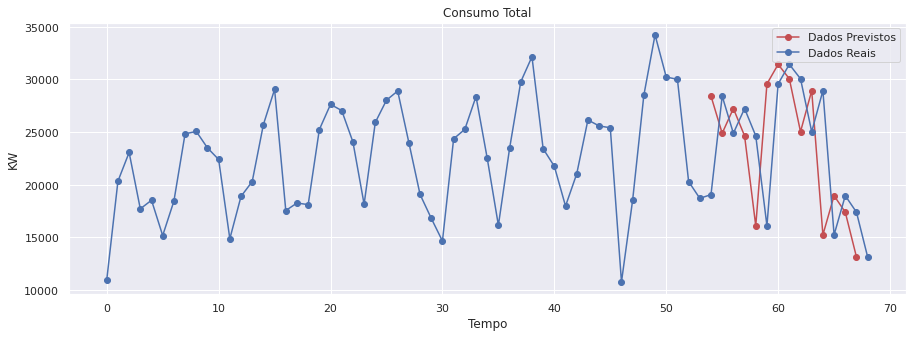

In [39]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_previsoes, marker='o', color="r")
_ = plt.plot(UC1["Consumo Total"], marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KW")
_ = plt.legend([ 'Dados Previstos', 'Dados Reais'])
_ = plt.title("Consumo Total")
plt.show()

#Keras modelo de Regressão Linear Clássico Functional Code

In [40]:
# Load layers
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping

# Input layer
input_tensor = Input(shape=(1), name='Entrada')

# Create a dense layer and connect the dense layer to the input_tensor in one step
# Note that we did this in 2 steps in the previous exercise, but are doing it in one step now
output_tensor = Dense(units=1, name = 'Saida')(input_tensor)

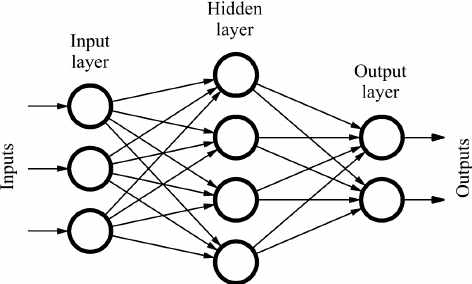

In [41]:
from keras.models import Model

In [50]:
model = Model(input_tensor, output_tensor)

In [51]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [52]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
Saida (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


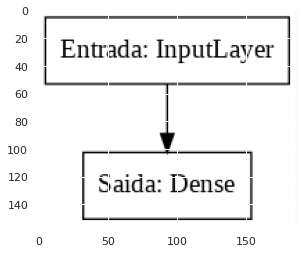

In [53]:
# Import the plotting function
from keras.utils import plot_model
import matplotlib.pyplot as plt
# Plot the model
plot_model(model, to_file='model.png')

# Display the image
data = plt.imread('model.png')
plt.imshow(data)
plt.show()

In [54]:
X_train, Y_train = split_sequence(df_train.values,1)
X_test, Y_test = split_sequence(df_test.values,1)

In [56]:
#Se define o early stoping
early_stopping_monitor = EarlyStopping(patience=2)
history = model.fit(X_train, Y_train, epochs=100, batch_size=1, validation_split=0.20, callbacks=[early_stopping_monitor], verbose=True)

Epoch 1/100
44/44 [==============================] - 0s 3ms/step - loss: 24626046.0000 - val_loss: 50465916.0000
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 24574092.0000 - val_loss: 50504364.0000
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 24561946.0000 - val_loss: 50516212.0000


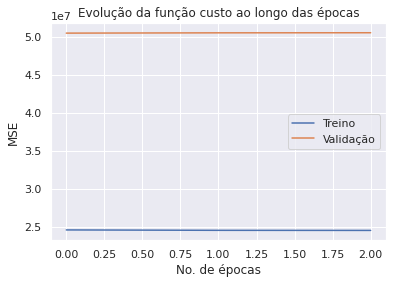

In [57]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Evolução da função custo ao longo das épocas')
plt.ylabel('MSE')
plt.xlabel('No. de épocas')
plt.legend(['Treino', 'Validação'])
plt.show()


In [58]:
predictions = model.predict(X_test)

# Avaliação

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
print("RMSE Absoluto do Modelo = ",mean_squared_error(predictions, Y_test, squared=False))

RMSE Absoluto do Modelo =  6748.285179256492


In [61]:
df_previsoes = pd.DataFrame(predictions,index=range(57,68,1))

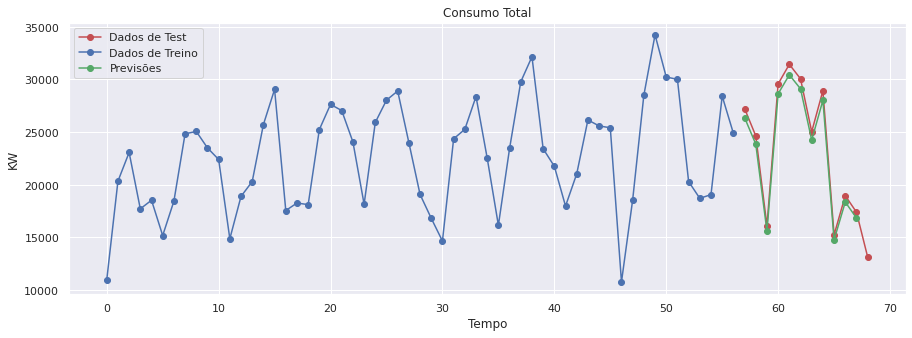

In [62]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(df_previsoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KW")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino', 'Previsões'])
_ = plt.title("Consumo Total")
plt.show()

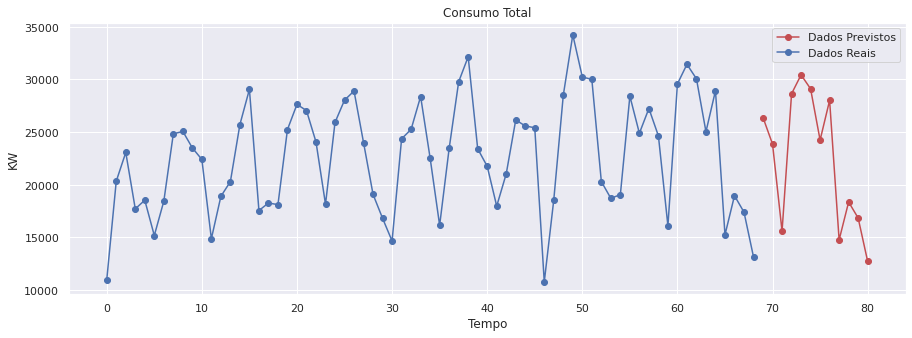

In [63]:
Lista_previsoes = []
previsoes = model.predict(np.array(df_test.iloc[0]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = model.predict(np.array(df_test.iloc[1]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = model.predict(np.array(df_test.iloc[2]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = model.predict(np.array(df_test.iloc[3]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = model.predict(np.array(df_test.iloc[4]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = model.predict(np.array(df_test.iloc[5]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = model.predict(np.array(df_test.iloc[6]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = model.predict(np.array(df_test.iloc[7]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = model.predict(np.array(df_test.iloc[8]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = model.predict(np.array(df_test.iloc[9]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = model.predict(np.array(df_test.iloc[10]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = model.predict(np.array(df_test.iloc[11]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])

df_previsoes = pd.DataFrame(Lista_previsoes,index=range(69,81,1))

fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_previsoes, marker='o', color="r")
_ = plt.plot(UC1["Consumo Total"], marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KW")
_ = plt.legend([ 'Dados Previstos', 'Dados Reais'])
_ = plt.title("Consumo Total")
plt.show()

#Keras Sequential Code

In [64]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential


In [65]:
from keras.callbacks import EarlyStopping
# Save the number of columns in predictors: n_cols
n_cols =  X_train.shape[1]
# Set up the model: model
model = Sequential()
# Add the first layer
model.add(Dense(units= 1, input_shape=(n_cols,)))
model.add(Dense(units= 200))
# Add the output layer
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mean_squared_error"])
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)
# Verify that model contains information from compiling
model_training = model.fit(X_train, Y_train,batch_size=1 , epochs=100, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=True)

Epoch 1/100
44/44 [==============================] - 0s 4ms/step - loss: 399748482.8444 - mean_squared_error: 399748482.8444 - val_loss: 142986752.0000 - val_mean_squared_error: 142986752.0000
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 74265169.1556 - mean_squared_error: 74265169.1556 - val_loss: 50580704.0000 - val_mean_squared_error: 50580704.0000
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 35030845.6889 - mean_squared_error: 35030845.6889 - val_loss: 51541940.0000 - val_mean_squared_error: 51541940.0000
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 23183175.7556 - mean_squared_error: 23183175.7556 - val_loss: 51645628.0000 - val_mean_squared_error: 51645628.0000


In [66]:
predictions = model.predict(X_test)

In [68]:
df_previsoes = pd.DataFrame(predictions,index=range(57,68,1))

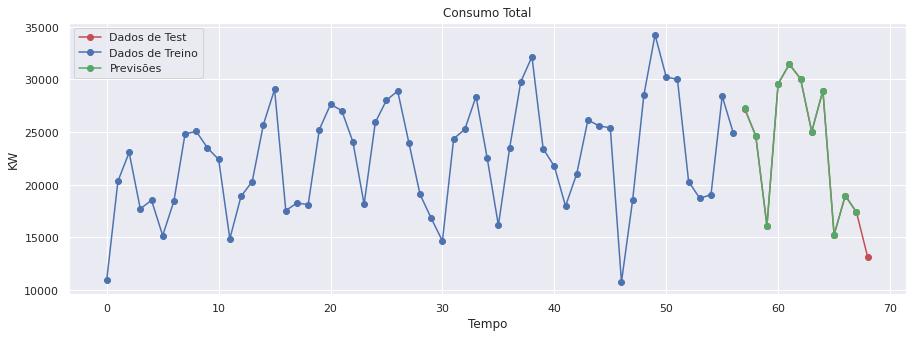

In [69]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(df_previsoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KW")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino', 'Previsões'])
_ = plt.title("Consumo Total")
plt.show()

In [71]:
from keras.callbacks import EarlyStopping
# Save the number of columns in predictors: n_cols
n_cols =  X_train.shape[1]
# Set up the model: model
model = Sequential()
# Add the first layer
model.add(Dense(units= 1, input_shape=(n_cols,)))
model.add(Dense(units= 20))
model.add(Dense(units= 10))
# Add the output layer
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mean_squared_error"])
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)
# Verify that model contains information from compiling
model.fit(X_train, Y_train,batch_size=1 , epochs=200, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=True)

Epoch 1/200
44/44 [==============================] - 0s 4ms/step - loss: 819277826.8444 - mean_squared_error: 819277826.8444 - val_loss: 124972552.0000 - val_mean_squared_error: 124972552.0000
Epoch 2/200
44/44 [==============================] - 0s 2ms/step - loss: 47474044.0889 - mean_squared_error: 47474044.0889 - val_loss: 51823628.0000 - val_mean_squared_error: 51823628.0000
Epoch 3/200
44/44 [==============================] - 0s 2ms/step - loss: 22964802.5778 - mean_squared_error: 22964802.5778 - val_loss: 50455092.0000 - val_mean_squared_error: 50455092.0000
Epoch 4/200
44/44 [==============================] - 0s 2ms/step - loss: 20844327.2111 - mean_squared_error: 20844327.2111 - val_loss: 50997148.0000 - val_mean_squared_error: 50997148.0000
Epoch 5/200
44/44 [==============================] - 0s 2ms/step - loss: 24909960.4833 - mean_squared_error: 24909960.4833 - val_loss: 51695060.0000 - val_mean_squared_error: 51695060.0000


In [72]:
predictions = model.predict(X_test)

In [73]:
df_previsoes = pd.DataFrame(predictions,index=range(57,68,1))

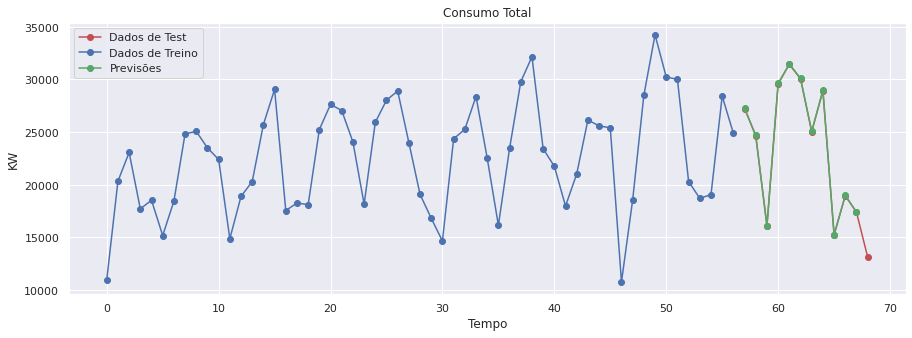

In [74]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(df_previsoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KW")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino', 'Previsões'])
_ = plt.title("Consumo Total")
plt.show()